# Emissions Scenarios

In [2]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["figure.dpi"] = 150
savefig_dpi = 300
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
import warnings
warnings.filterwarnings("ignore")

FS = 10
plt.rc('text',usetex=True)
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']}) 
plt.rc('savefig',facecolor='white')
plt.rc('axes',facecolor='white')
plt.rc('axes',labelcolor='dimgrey')
plt.rc('axes',labelcolor='dimgrey')
plt.rc('xtick',color='dimgrey')
plt.rc('ytick',color='dimgrey')

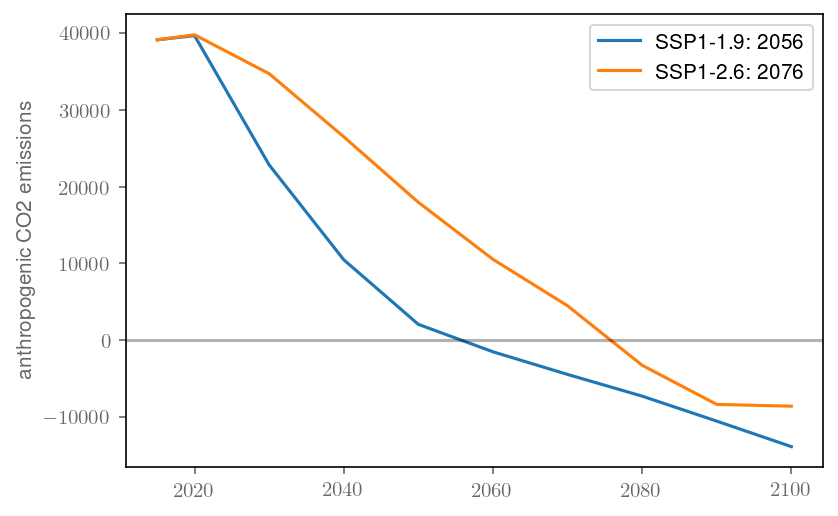

In [3]:
x = [2015,2020,2030,2040,2050,2060,2070,2080,2090,2100]
x_interp = np.arange(2015,2101)

ssp119 = [39152.726,39693.726,22847.271,10475.089, 2050.362, -1525.978,-4476.970,-7308.783,-10565.023,-13889.788]
ssp126 = [39152.726,39804.013,34734.424,26509.183,17963.539,10527.979,4476.328,-3285.043,-8385.183,-8617.786]

ssp119_interp = np.interp(x_interp,x,ssp119)
ssp126_interp = np.interp(x_interp,x,ssp126)

i = np.where(ssp119_interp<=0)[0]
ssp119_yr = x_interp[i][0]

i = np.where(ssp126_interp<=0)[0]
ssp126_yr = x_interp[i][0]

plt.plot(x_interp,ssp119_interp,label='SSP1-1.9: ' + str(ssp119_yr))
plt.plot(x_interp,ssp126_interp,label='SSP1-2.6: ' + str(ssp126_yr))

plt.axhline(y=0,color='k',alpha=.3)
plt.ylabel('anthropogenic CO2 emissions')
plt.legend()
plt.show()

